**ASSIGNMENT - 4**

**TASK - 1**

Load the dataset

In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/winequality-red.csv')

**TASK - 2**

Perform Data Preprocessing including Visualization

**Data Preprocessing**

In [26]:
df.shape

(1599, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

**Data Visualization**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-d7414a6caaf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.density)


<Axes: xlabel='density', ylabel='Density'>

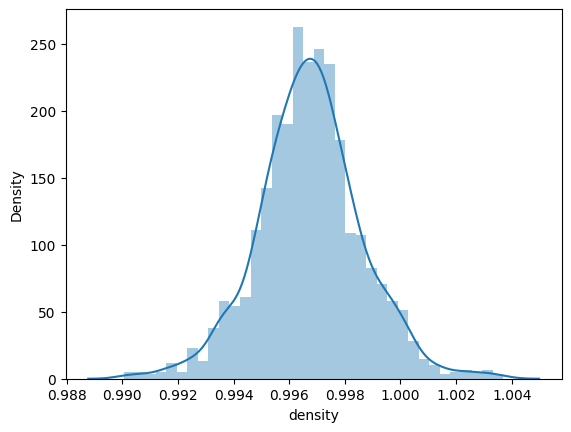

In [18]:
#Univariate
sns.distplot(df.density)

<ipython-input-20-d3a19b159d9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.pH)


<Axes: xlabel='pH', ylabel='Density'>

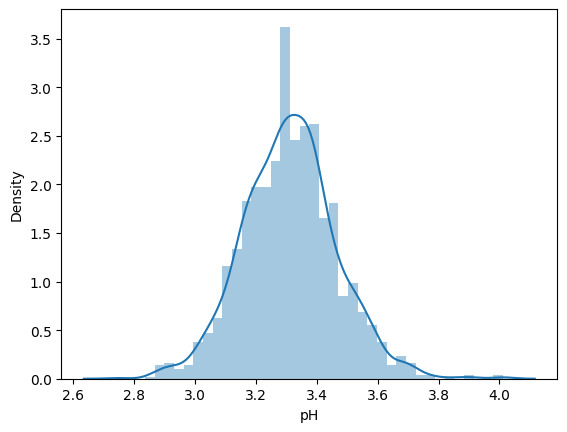

In [20]:
#Univariate
sns.distplot(df.pH)

<Axes: xlabel='density', ylabel='quality'>

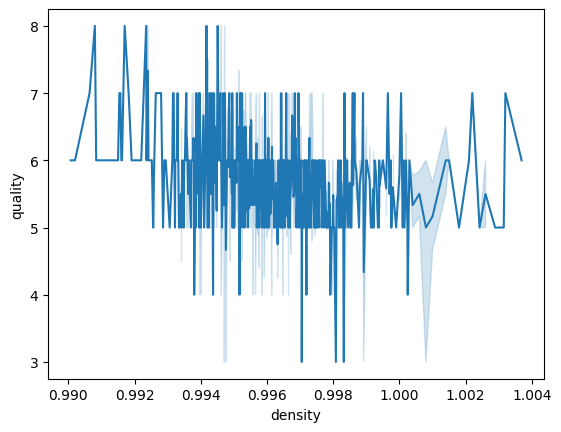

In [21]:
#Bivariate
sns.lineplot(x = df.density,y=df.quality)

<Axes: xlabel='pH', ylabel='quality'>

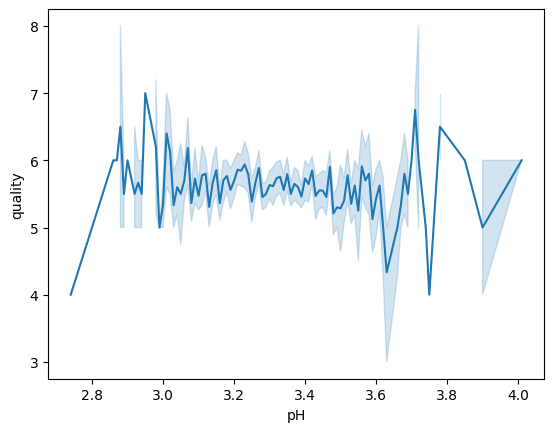

In [23]:
#Bivariate
sns.lineplot(x = df.pH,y=df.quality)

<Axes: xlabel='density', ylabel='quality'>

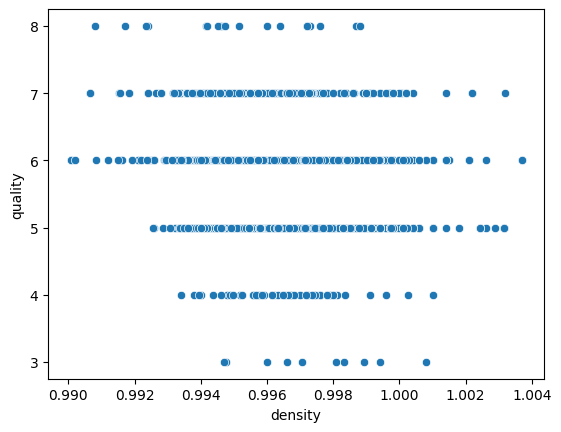

In [24]:
#Bivariate
sns.scatterplot(x = df.density,y=df.quality)

<Axes: xlabel='pH', ylabel='quality'>

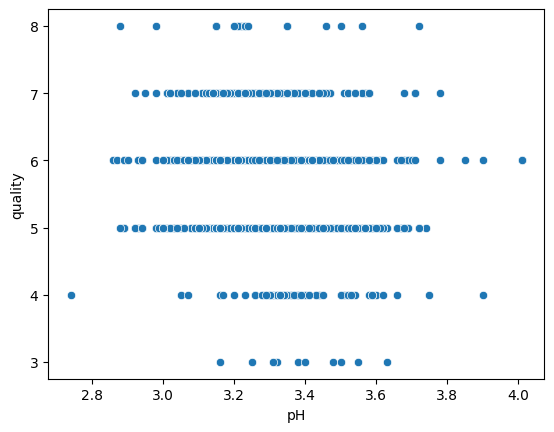

In [25]:
#Bivariate
sns.scatterplot(x = df.pH,y=df.quality)

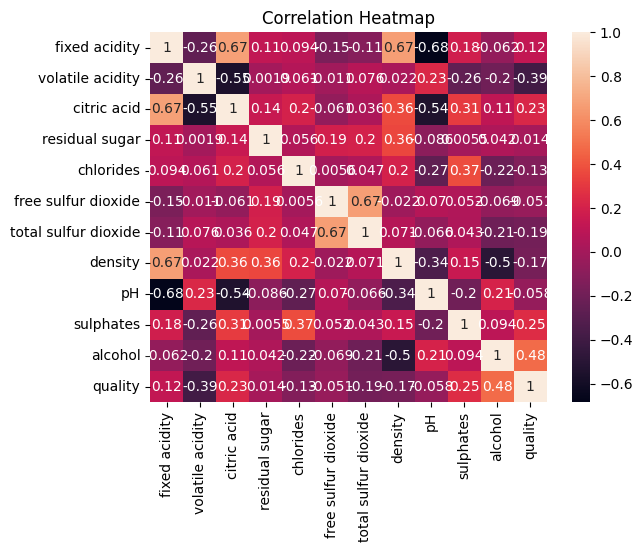

In [9]:
#Multivariate
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

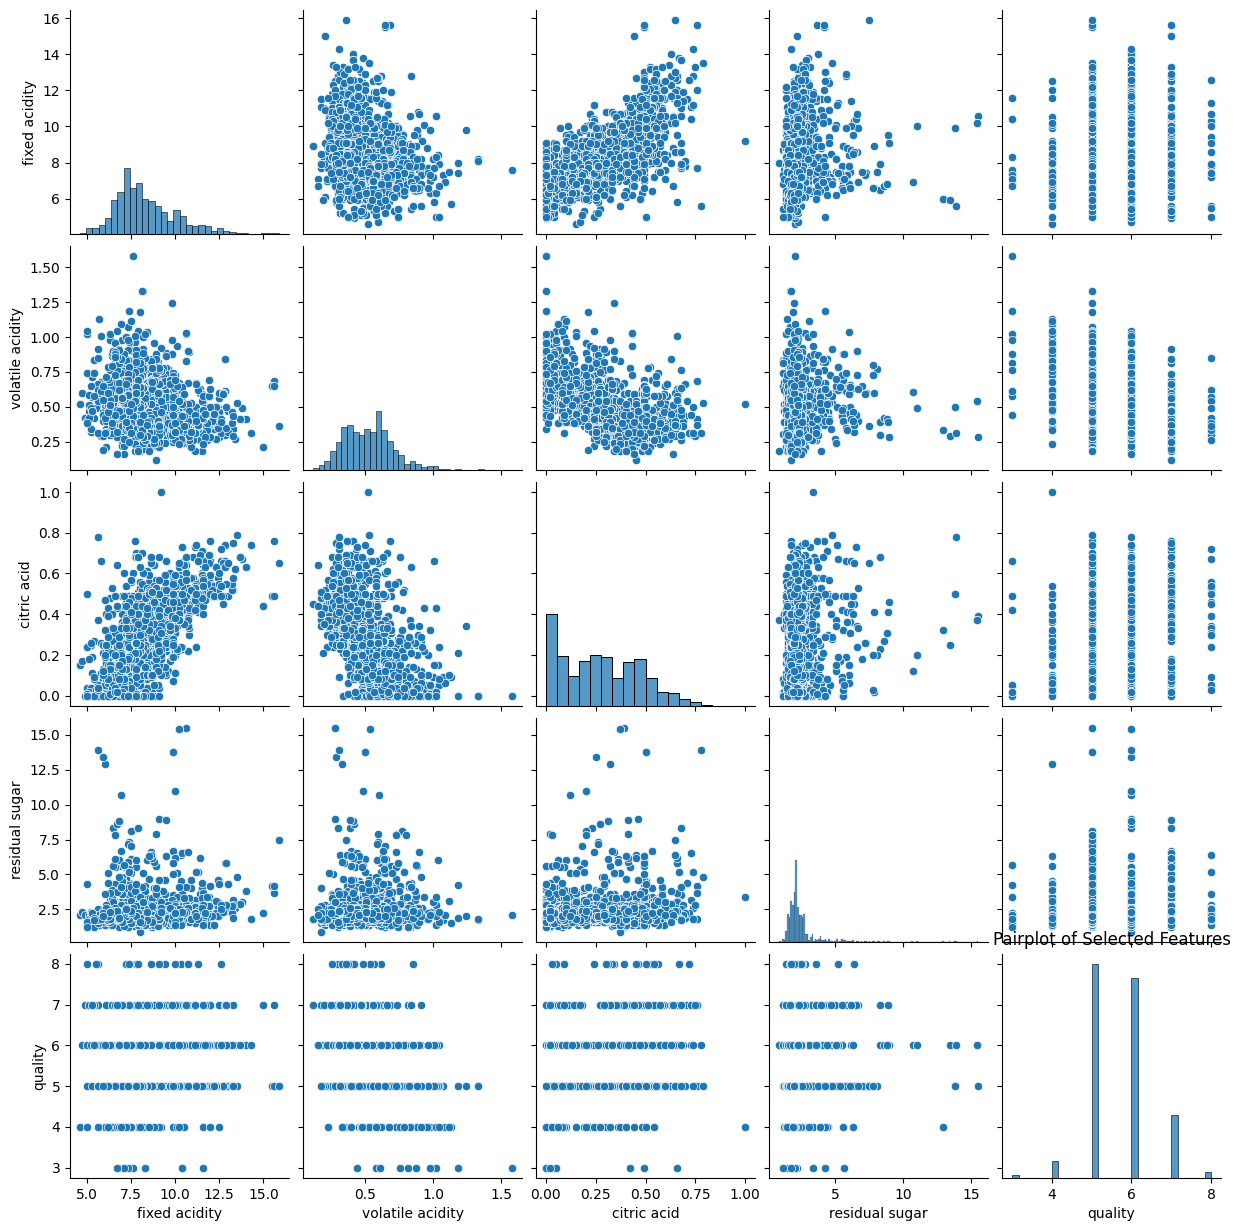

In [10]:
#Multivariate
# Pairplot
sns.pairplot(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'quality']])
plt.title('Pairplot of Selected Features')
plt.show()

In [31]:
#Outlier Detection and replacement with median

numeric_columns = df.select_dtypes(include=['float64']).columns

def replace_outliers_with_median(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[column] = np.where(
        (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound),
        dataframe[column].median(),
        dataframe[column]
    )
for column in numeric_columns:
    replace_outliers_with_median(df, column)

df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000
mean,8.154534,0.520547,0.270513,2.181801,0.078773,15.163852,42.825516,0.996735,3.308799,0.63581,10.392798,5.636023
std,1.490883,0.165588,0.193945,0.426845,0.014335,9.140986,26.757870,0.001643,0.138951,0.11875,1.017398,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.992350,2.930000,0.33000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995680,3.210000,0.55000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.62000,10.200000,6.000000
75%,9.000000,0.630000,0.420000,2.400000,0.086000,21.000000,58.000000,0.997800,3.400000,0.71000,11.000000,6.000000
max,12.300000,1.010000,0.790000,3.650000,0.119000,42.000000,122.000000,1.001000,3.680000,0.99000,13.500000,8.000000


In [34]:
X = df.drop(columns=['quality'])  # independent variables
y = df['quality'] # dependent variables

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [36]:
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078
1,0.415584,0.853933,0.000000,0.618182,0.730769,0.585366,0.525862,0.514451,0.360000,0.530303,0.274510
2,0.415584,0.719101,0.050633,0.509091,0.653846,0.341463,0.413793,0.537572,0.440000,0.484848,0.274510
3,0.857143,0.179775,0.708861,0.363636,0.435897,0.390244,0.465517,0.653179,0.306667,0.378788,0.274510
4,0.363636,0.651685,0.000000,0.363636,0.448718,0.243902,0.241379,0.630058,0.773333,0.348485,0.196078


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [38]:
X_train.shape

(1119, 11)

In [40]:
y_train.shape

(1119,)

In [41]:
X_test.shape

(480, 11)

In [42]:
y_test.shape

(480,)

**TASK - 3**

Machine Learning model building

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

**TASK - 4**

Evaluate the model

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 0.42
R-squared (R2) Score: 0.33


In [65]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


**TASK - 5**

Tast with random observation

In [68]:
linear_reg_model.predict([[5.2,0.85,0.91,5.0,0.999,99.0,500.0,0.99958,7.00,0.94,15.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.02158281])

In [69]:
linear_reg_model.predict([[8.2,0.55,0.01,10.0,0.810,85.0,100.0,0.52958,7.85,1.94,150.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61.93172853])